In [1]:
import numpy as np
import pandas as pd
import os
from os import path
from PIL import Image
import wordcloud
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karthik\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Open corresponding file
filename = "metoo_tweets_dec2017"
file_format = filename+'.csv'
pwd = os.getcwd()
encoding = ['utf8','latin1','iso-8859-1','cp1252','ascii']
encoding_list = len(encoding)
#Try all the possible encoding schemes to see which one applies to the dataset
for encoding_type in range(0,encoding_list-1):
    try:
        if file_format.endswith('.csv'):
            df = pd.read_csv(file_format, index_col=None , encoding = encoding[encoding_type])       
    except Exception:
        pass

C:\Users\Karthik\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,6,9,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF,False,0.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",ahmediaTV,0,False,False,NaN,NaN
1,2,@johnconyersjr @alfranken why have you guys ...,False,0.0,johnconyersjr,11/29/17 23:59,False,NaN,9.360000e+17,2.6615e+08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",JesusPrepper74,0,False,False,NaN,NaN
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...,False,0.0,NaN,11/29/17 23:59,True,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",DemerisePotvin,0,False,False,NaN,NaN
3,4,Women have been talking about this crap the en...,False,0.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",TheDawnStott,0,False,False,NaN,NaN
4,5,.@BetteMidler please speak to this sexual assa...,False,15.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",scottygirl2014,11,False,False,NaN,NaN


In [4]:
#Plots the value count of the specified column indexes 
def wordcloudOfColumns(df):
    porter = PorterStemmer()
    wordnet_lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) 
    print("The index values and the categorical columns are listed below:")
    #Lists the categorical columns in a dataset
    for index,column in enumerate(df.loc[:, df.dtypes == object]):
        print(index,column)
    ColumnIndexToBePlotted = [] 
    for i in range(0, 1):
        Number = int(
            input("Enter the index you want to plot a word cloud\n"))
        ColumnIndexToBePlotted.append(Number)
    columns_to_plot = [df.loc[:, df.dtypes == object].columns[i] for i in ColumnIndexToBePlotted] 
    word_dictionary = {}
    for index in range(0,len(columns_to_plot)):
        word_dictionary.update(df.iloc[0:100][columns_to_plot[index]])
    col = str(word_dictionary.values()) 
    word_tokens = word_tokenize(col)
    filtered_sentence = [word for word in word_tokens if not word in stop_words] 
    filtered_sentence = [] 
    lemmatized_sentence = []
    stem_sentence = []
    for word in word_tokens: 
        if word not in stop_words: 
            filtered_sentence.append(word)
    for word in filtered_sentence:
        lemmatized_sentence.append(wordnet_lemmatizer.lemmatize(word))
    for word in lemmatized_sentence:
        stem_sentence.append(porter.stem(word))
    for index in range(0,len(columns_to_plot)):
        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stop_words, 
        min_font_size = 10, collocations=False).generate(''.join(str(filtered_sentence)))
        # plot the WordCloud image                        
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud, interpolation='bilinear') 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.show()

The index values and the categorical columns are listed below:
0 text
1 favorited
2 replyToSN
3 created
4 truncated
5 replyToUID
6 statusSource
7 screenName
8 retweetCount
9 retweeted
Enter the index you want to plot a word cloud
7


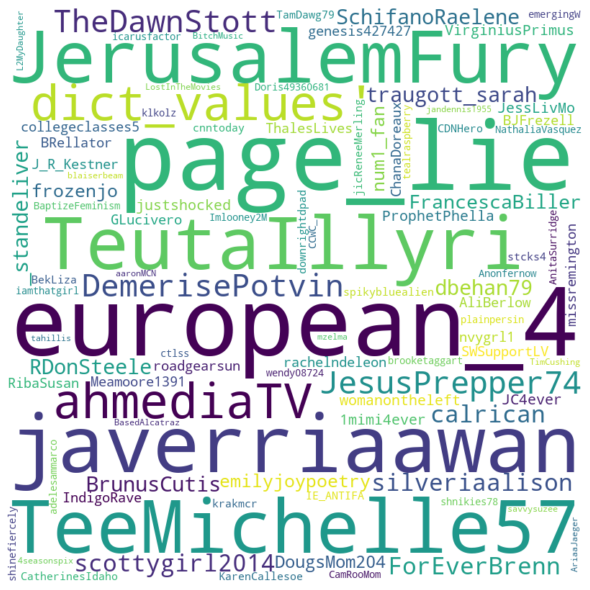

In [5]:
wordcloudOfColumns(df)

In [ ]:
porter = PorterStemmer()
word_list = ["connected", "connecting", "connection", "connections"]

for word in word_list:
    print(porter.stem(word))

In [59]:
# def spcy(df):
#     nlp = English()
#     print("The index values and the categorical columns are listed below:")
#     #Lists the categorical columns in a dataset
#     for index,column in enumerate(df.loc[:, df.dtypes == object]):
#         print(index,column)
#     ColumnIndexToBePlotted = [] 
#     for i in range(0, 1):
#         Number = int(
#             input("Enter the index you want to plot a word cloud\n"))
#         ColumnIndexToBePlotted.append(Number)
#     columns_to_plot = [df.loc[:, df.dtypes == object].columns[i] for i in ColumnIndexToBePlotted] 
#     word_dictionary = {}
#     for index in range(0,len(columns_to_plot)):
#         word_dictionary.update(df.iloc[0:100][columns_to_plot[index]])
#         col = str(word_dictionary.values())
#     my_doc = nlp(col)
#     token_list = []
#     for token in my_doc:
#         token_list.append(token.text)
#     print(token_list)
#     filtered_sentence =[] 
#     for word in token_list:
#         lexeme = nlp.vocab[word]
#         if lexeme.is_stop == False:
#             filtered_sentence.append(word) 
#     print(filtered_sentence)

In [61]:
df

,Unnamed: 0,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,1,American Harem.. #MeToo https://t.co/HjExLJdGuF,False,0.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://instagram.com"" rel=""nofollow"">...",ahmediaTV,0,False,False,NaN,NaN
1,2,@johnconyersjr @alfranken why have you guys ...,False,0.0,johnconyersjr,11/29/17 23:59,False,NaN,9.360000e+17,2.6615e+08,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",JesusPrepper74,0,False,False,NaN,NaN
2,3,Watched Megan Kelly ask Joe Keery this A.M. if...,False,0.0,NaN,11/29/17 23:59,True,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",DemerisePotvin,0,False,False,NaN,NaN
3,4,Women have been talking about this crap the en...,False,0.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",TheDawnStott,0,False,False,NaN,NaN
4,5,.@BetteMidler please speak to this sexual assa...,False,15.0,NaN,11/29/17 23:59,False,NaN,9.360000e+17,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",scottygirl2014,11,False,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393130,393131,RT @Suffragentleman: You can only choose one.....,FALSE,0.0,NaN,12/25/17 0:00,False,NaN,9.450820e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",boaomega22,616,True,False,NaN,NaN
393131,393132,"#MeToo, say victims of sexual harassment in Ja...",FALSE,0.0,NaN,12/25/17 0:00,False,NaN,9.450820e+17,NaN,"<a href=""http://bufferapp.com"" rel=""nofollow"">...",April_Magazine,0,False,False,NaN,NaN
393132,393133,Susan Collins tries to #MeToo her way out of h...,FALSE,0.0,NaN,12/25/17 0:00,False,NaN,9.450820e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Noofer55,0,False,False,NaN,NaN
393133,393134,RT @OneMillionVjj: Punish those who choose not...,FALSE,0.0,NaN,12/25/17 0:00,False,NaN,9.450820e+17,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",ZBezzt,5,True,False,NaN,NaN


In [111]:
# def rmchar(df):
#     porter = PorterStemmer()
#     wordnet_lemmatizer = WordNetLemmatizer()
#     stop_words = set(stopwords.words('english')) 
#     print("The index values and the categorical columns are listed below:")
#     #Lists the categorical columns in a dataset
#     for index,column in enumerate(df.loc[:, df.dtypes == object]):
#         print(index,column)
#     ColumnIndexToBePlotted = [] 
#     for i in range(0, 1):
#         Number = int(
#             input("Enter the index you want to plot a word cloud\n"))
#         ColumnIndexToBePlotted.append(Number)
#     columns_to_plot = [df.loc[:, df.dtypes == object].columns[i] for i in ColumnIndexToBePlotted] 
#     tweet_dictionary = []
#     for i in range(0,len(columns_to_plot)):
#         tweet_dictionary.append(df[columns_to_plot[i]])
#     for i in range(0,len(tweet_dictionary)):
#         link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
#         links         = re.findall(link_regex, tweet_dictionary[i])
#     for link in links:
#         tweet_dictionary[i] = tweet_dictionary[i].replace(link[0], ', ') 
#         tweet_dictionary[0]azZzZ
